In [229]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# 1. Random Data Generator

## a. Univariate gaussian data generator

Since a $N(\mu,\sigma^2)$ can be generated as $X = \mu + \sigma Z$  where Z is standard normal<br>
The Box-Muller method uses two independent random numbers U and V distributed uniformly in (0,1). Then the two random variables X and Y.<br>
$X = \sqrt{-2\ln U}\cos(2\pi V)$ 

In [230]:
def univariate_gaussian_data_generator(m, s):    
    # Box-Muller method
    U = np.random.uniform(0,1)
    V = np.random.uniform(0,1)
    Z = np.sqrt(-2*np.log(U))*math.cos(2*math.pi*V)
    
    data = m + s**0.5*Z # output
    
    return data

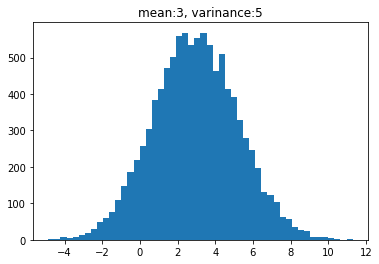

In [231]:
m = 3
s = 5
n_sample = 10000
data = []

for i in range (n_sample):
    data.append(univariate_gaussian_data_generator(m, s))

plt.hist(data, 50)
plt.title('mean:{}, varinance:{}'.format(m,s))
plt.show()

## b. Polynomail basis linear model data generator

$y = W^T \phi(x) + e$ <br>
$W$ is a $n \times 1$ vector<br>
$e ～　N(0,a)$<br>
$-1.0 < x < 1.0$

In [232]:
def poly_basis_linear_model_gen(n, a, w):
    y = 0
    x = np.random.uniform(-1.0,1.0)
    for i in range(n):
        y += w[i]*x**i
    e = univariate_gaussian_data_generator(0, a)
    y = y + e
    #print('data from poly_gen ({}, {})'.format(x, y))
    return x, y

In [233]:
n = 2
a = 10
w = (2, 5)
poly_basis_linear_model_gen(n, a, w)

(0.8599684248596873, 4.2210513868452475)

# 2. Sequential Estimator

HINT: Welford's online algorithm<br>
It is often to be able to compute the variance in a single pass, inspecting each value $x_{i}$ . <br>
The following formula cna be used to update the mean and .(estimated) variance of the sequence, for an additional element $x_{n}$. Here $\bar{x}_{n}$ denotes the sample mean of the first $n$ samples $(x_{1},....,x{n})$,<br>
$\sigma_{n}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ thier biased sample vairance.<br>
$s_{n}^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ their unbiased sample variance.<br>
$\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ here denoted $M_{2,n}$<br>
$M_{2,n} = M_{2,n-1} + (x_{n} - \bar{x}_{n-1})(x_{n}-\bar{x}_{n})$<br>
$\sigma^2_{n} = \frac{M_{2,n}}{n}$<br>
$s^2_{n} = \frac{M_{2,n}}{n-1}$<br>
It is also common to denote $M_{k} = \bar{x}_{k} $ and $S_{k} = M_{2,k}$

In [234]:
# For a new value newValue, compute the new count, new mean, the new M2.
# mean accumulates the mean of the entire dataset
# M2 aggregates the squared distance from the mean
# count aggregates the number of samples seen so far
def update(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2
    return (count, mean, M2)

# Retrieve the mean, variance and sample variance from an aggregate
def finalize(existingAggregate):
    (count, mean, M2) = existingAggregate
    if count == 0:
        (mean, variance, sampleVariance) = (999, 0, 0)
    else:
        (mean, variance, sampleVariance) = (mean, M2 / count, M2 / (count - 1))
        #print('count: {}'.format(count))
        print('Mean={} Varaince={} '.format(mean, variance))
        print()
    return (mean, variance, sampleVariance)

def sequential_estimator(data):
    count = 0
    mean = 0
    M2 = 0
    new_mean = 0
    new_M2 = 0
    sample_variance = 0
    for i in range(len(data)):
        existingAggregate = (count, mean, M2)
        newAggregate = (count, new_mean, new_M2)
        new_data = data[i]
        print('Add data point: {}'.format(new_data))
        
        newAggregate = update(existingAggregate, new_data)
        new_mean, new_variance, sample_variance = finalize(newAggregate)
        
        count += 1

In [235]:
m = 3.0
s = 5.0
n_samples = 100
data = []
for i in range(n_samples):
    data.append(univariate_gaussian_data_generator(m, s))

estimation = sequential_estimator(data)

Add data point: 7.887989750208845
Mean=7.887989750208845 Varaince=0.0 

Add data point: 2.310078339294007
Mean=1.1550391696470035 Varaince=1.3341154834188393 

Add data point: 0.4627719598423208
Mean=0.15425731994744027 Varaince=0.04759064151473389 

Add data point: 2.1026974552269606
Mean=0.5256743638067402 Varaince=0.8290006102908629 

Add data point: 0.6536873031071715
Mean=0.1307374606214343 Varaince=0.06836913443896434 

Add data point: 5.5831134047924635
Mean=0.9305189007987439 Varaince=4.329327123718513 

Add data point: 4.236117042474923
Mean=0.6051595774964176 Varaince=2.197308685413856 

Add data point: 1.507688700631511
Mean=0.18846108757893887 Varaince=0.24862307072005524 

Add data point: 4.852242148884479
Mean=0.53913801654272 Varaince=2.325358407052945 

Add data point: 4.734203922339409
Mean=0.47342039223394095 Varaince=2.017141810046446 

Add data point: 3.533790289760824
Mean=0.32125366270552946 Varaince=1.0320391580171808 

Add data point: 1.6861981793247538
Mean=0.1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


# 3. Baysian Linear regression

## Input 

The precision for initial prior $w ～ N(0,b^{-1}I)$ <br>
All other required inputs for the polynomial basis linear model generator(1.b)<br>

In [236]:
b = 100
n = 4
a = 1
w = (1,2,3,4)
n_samples = 10000
data = []
point_x=[]
point_y=[]

mean_record = []
variance_record = []

# N(0,b^-1I)
mean = np.zeros((n,1))
variance = (1/b)*np.identity(n) 

for i in range(n_samples):
    data.append(poly_basis_linear_model_gen(n, a, w))

### Deriving posterior probability$P(W|D)$for Bayesian regression 

#### -Update Note

$\bigwedge_{new} = ax^{T}x + b$, new precision matrix $\bigwedge_{new}$<br>
$\mu_{new} = a\bigwedge_{new}^{-1}x^{T}Y$<br>
$\mu_{new} = \bigwedge^{-1}(aX^{T}y+Sm)$ (modified)<br>
$a = scalar, which\ is\ our\ noise\ variace$<br>
$x = design \ matrix = \begin{bmatrix} x_{0} \\ x_{1} \\ x_{2} \end{bmatrix}$<br>
$b = prior\ precision\ matrix\ = bI = \begin{bmatrix} b&0&0 \\ 0&b&0 \\ 0&0&b \end{bmatrix}$<br>
$Y = scalar\ data\ Y_{i}$<br>
$\bigwedge_{new} = matrix\ 3 \times 3$<br>
$\mu = matrix\ 3 \times 1$

#### -Predict Note

$\mu_{new} = \mu^{T}x$<br>
$\bigwedge_{new}^{-1} = \sigma_{new}^{2} = \frac{1}{a} + x^{T}\bigwedge x$

In [237]:
def to_X(x_value):
    X = np.zeros((1,n))
    for i in range(n):
        X[0,i] = x_value**i
    return X

def update(a, X, Y, mean, variance):
    covariance_new = 0
    mean_new = 0
    S = np.linalg.inv(variance)
    covariance_new = a*X.T@X + variance
    mean_new = np.linalg.inv(covariance_new)@(a*X.T*Y + S@mean)
    return covariance_new, mean_new

def baysian_linear_regression(data):
    covariance_new = 0
    mean_new = 0
    
    for i in range(len(data)):
        # Update
        point = data[i]
        print('Add data point {}:'.format(point))
        X = to_X(point[0])
        Y = point[1]
        covariance_new, mean_new = update(a, X, Y, mean, variance)
        print('Posterior mean:')
        print(mean_new)
        print()
        print('Posterior variance:')
        print(covariance_new)
        print('---------------------------------------------------------------------')
        
        # Predict
        mean_pred = (X@mean_new).item()
        variance_pred = ((1/a) + X@covariance_new@X.T).item()
        print('Predictive distribution ~ N({}, {})'.format(mean_pred, variance_pred))
        print()
        
        # Record 
        mean_record.append(mean_new)
        variance_record.append(covariance_new)
        
        # Save
        point_x.append(point[0])
        point_y.append(point[1])
    
    return mean_record, variance_record, point_x, point_y

def visualize(x, mean, variance, w):
    gt_mean = np.zeros(500)
    gt_variance = np.zeros(500)
    _mean_predict = np.zeros((10000,500))
    _variance_predict = np.zeros((10000,500))
    for j in range(10000):
        for i in range(len(x)):
            X = to_X(x[i])
            _mean_predict[j][i]=(X@mean[j]).item()
            _variance_predict[j][i]=((1/a)+X@variance[j]@X.T).item()
    
    for i in range(len(x)):
        X = to_X(x[i])
        gt_mean[i] = (X@w).item()
        gt_variance[i] = ((1/a)+X@np.zeros((n,n))@X.T).item()
        
    plt.subplot(2,2,1)    
    plt.plot(point_x[:0],point_y[:0],'bo')
    plt.plot(x,gt_mean,'k-')
    plt.plot(x,gt_mean+gt_variance,'r-')
    plt.plot(x,gt_mean-gt_variance,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('Ground Truth')
    
    mean_predict = _mean_predict[9999]
    variance_predict = _variance_predict[9999]
    plt.subplot(2,2,2)    
    plt.plot(point_x[:10000],point_y[:10000],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('Predict Result')
    
    mean_predict = _mean_predict[9]
    variance_predict = _variance_predict[9]
    plt.subplot(2,2,3)    
    plt.plot(point_x[:10],point_y[:10],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('After 10 incomes')
    
    mean_predict = _mean_predict[49]
    variance_predict = _variance_predict[49]
    plt.subplot(2,2,4)    
    plt.plot(point_x[:50],point_y[:50],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('After 50 incomes')
    
    plt.tight_layout()
    
    
    

In [238]:
mean_record, variance_record, point_x, point_y =  baysian_linear_regression(data)

Add data point (-0.10845498683410781, 0.7995716078653727):
Posterior mean:
[[ 0.78243436]
 [-0.08485891]
 [ 0.00920337]
 [-0.00099815]]

Posterior variance:
[[ 1.01000000e+00 -1.08454987e-01  1.17624842e-02 -1.27570007e-03]
 [-1.08454987e-01  2.17624842e-02 -1.27570007e-03  1.38356034e-04]
 [ 1.17624842e-02 -1.27570007e-03  1.01383560e-02 -1.50054018e-05]
 [-1.27570007e-03  1.38356034e-04 -1.50054018e-05  1.00016274e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.7917472642200101, 2.03406562863878)

Add data point (-0.4673975189624979, -0.2604572566438998):
Posterior mean:
[[-0.20243661]
 [ 0.09461837]
 [-0.04422439]
 [ 0.02067037]]

Posterior variance:
[[ 1.01       -0.46739752  0.21846044 -0.10210787]
 [-0.46739752  0.22846044 -0.10210787  0.04772496]
 [ 0.21846044 -0.10210787  0.05772496 -0.02230653]
 [-0.10210787  0.04772496 -0.02230653  0.02042602]]
---------------------------------------------------------------------
Predi

 [ 0.11467858]]

Posterior variance:
[[ 1.01       -0.65875172  0.43395383 -0.28586784]
 [-0.65875172  0.44395383 -0.28586784  0.18831593]
 [ 0.43395383 -0.28586784  0.19831593 -0.12405344]
 [-0.28586784  0.18831593 -0.12405344  0.09172042]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.6835717468703648, 3.920622454092292)

Add data point (-0.48883056594999696, -1.1742635267745387):
Posterior mean:
[[-0.88979632]
 [ 0.43495964]
 [-0.21262157]
 [ 0.10393592]]

Posterior variance:
[[ 1.01       -0.48883057  0.23895532 -0.11680867]
 [-0.48883057  0.24895532 -0.11680867  0.05709965]
 [ 0.23895532 -0.11680867  0.06709965 -0.02791205]
 [-0.11680867  0.05709965 -0.02791205  0.02364426]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.1653655635278235, 2.7284090720110745)

Add data point (-0.029894163700968646, 1.6913537577241575):
Posterior mean:
[[ 1.67312595e+00]
 [-5.00167011e-02]
 [

 [0.97116134 0.96173447 0.9523991  0.95315435]]
---------------------------------------------------------------------
Predictive distribution ~ N(8.539346219755434, 16.13650544283124)

Add data point (0.11037594594272604, 2.745427929017537):
Posterior mean:
[[2.68545348]
 [0.29640947]
 [0.03271648]
 [0.00361111]]

Posterior variance:
[[1.01000000e+00 1.10375946e-01 1.21828494e-02 1.34469353e-03]
 [1.10375946e-01 2.21828494e-02 1.34469353e-03 1.48421821e-04]
 [1.21828494e-02 1.34469353e-03 1.01484218e-02 1.63821988e-05]
 [1.34469353e-03 1.48421821e-04 1.63821988e-05 1.00018082e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.718573394187686, 2.034941594571685)

Add data point (0.9118338542570426, 7.299815635108617):
Posterior mean:
[[2.34909192]
 [2.14198154]
 [1.95313128]
 [1.78093123]]

Posterior variance:
[[1.01       0.91183385 0.83144098 0.75813603]
 [0.91183385 0.84144098 0.75813603 0.6912941 ]
 [0.83144098 0.75813603 0.7012

 [-0.04640116  0.01667395 -0.00599167  0.01215307]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.0949311830834, 2.3292794725658563)

Add data point (0.7709132050404888, 6.9941933689855995):
Posterior mean:
[[3.22697012]
 [2.48771388]
 [1.91781148]
 [1.47846619]]

Posterior variance:
[[1.01       0.77091321 0.59430717 0.45815924]
 [0.77091321 0.60430717 0.45815924 0.35320101]
 [0.59430717 0.45815924 0.36320101 0.27228732]
 [0.45815924 0.35320101 0.27228732 0.21990989]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.961923667776216, 5.676026932932962)

Add data point (0.2652207185251134, 1.4190327573410313):
Posterior mean:
[[1.3070956 ]
 [0.34666883]
 [0.09194376]
 [0.02438539]]

Posterior variance:
[[1.01       0.26522072 0.07034203 0.01865616]
 [0.26522072 0.08034203 0.01865616 0.004948  ]
 [0.07034203 0.01865616 0.014948   0.00131231]
 [0.01865616 0.004948   0.00131231 0.01034

 [0.46465902 0.35989778 0.27875583 0.22590801]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.6788524695970475, 5.7555173232142725)

Add data point (0.09847207067241115, -0.07059313433382086):
Posterior mean:
[[-6.92230925e-02]
 [-6.81654126e-03]
 [-6.71238933e-04]
 [-6.60982876e-05]]

Posterior variance:
[[1.01000000e+00 9.84720707e-02 9.69674870e-03 9.54858924e-04]
 [9.84720707e-02 1.96967487e-02 9.54858924e-04 9.40269354e-05]
 [9.69674870e-03 9.54858924e-04 1.00940269e-02 9.25902703e-06]
 [9.54858924e-04 9.40269354e-05 9.25902703e-06 1.00009118e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.06990090340855949, 2.029777168802898)

Add data point (-0.27709652867129186, -0.1647104243988634):
Posterior mean:
[[-0.1506777 ]
 [ 0.04175227]
 [-0.01156941]
 [ 0.00320584]]

Posterior variance:
[[ 1.01       -0.27709653  0.07678249 -0.02127616]
 [-0.27709653  0.08678249 -0.02127616

 [-0.0917023   0.041353   -0.01864806  0.01840931]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.6134398514550015, 2.5828325491405177)

Add data point (0.6015897150095069, 3.323932825308777):
Posterior mean:
[[2.14406916]
 [1.28984995]
 [0.77596047]
 [0.46680984]]

Posterior variance:
[[1.01       0.60158972 0.36191019 0.21772145]
 [0.60158972 0.37191019 0.21772145 0.13097898]
 [0.36191019 0.21772145 0.14097898 0.07879561]
 [0.21772145 0.13097898 0.07879561 0.05740263]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.3024921337182063, 3.387901731849789)

Add data point (0.44446798596164494, 2.3198583754323447):
Posterior mean:
[[1.84954159]
 [0.82206203]
 [0.36538025]
 [0.16239983]]

Posterior variance:
[[1.01       0.44446799 0.19755179 0.08780545]
 [0.44446799 0.20755179 0.08780545 0.03902671]
 [0.19755179 0.08780545 0.04902671 0.01734612]
 [0.08780545 0.03902671 0.01734612 0.01

 [-0.00101317]]

Posterior variance:
[[ 1.01000000e+00 -2.02236749e-01  4.08997025e-02 -8.27142285e-03]
 [-2.02236749e-01  5.08997025e-02 -8.27142285e-03  1.67278566e-03]
 [ 4.08997025e-02 -8.27142285e-03  1.16727857e-02 -3.38298733e-04]
 [-8.27142285e-03  1.67278566e-03 -3.38298733e-04  1.00684164e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.12771321263255525, 2.097526464937685)

Add data point (0.19664905237922325, 1.1165559859631382):
Posterior mean:
[[1.06315973]
 [0.20906935]
 [0.04111329]
 [0.00808489]]

Posterior variance:
[[1.01000000e+00 1.96649052e-01 3.86708498e-02 7.60458597e-03]
 [1.96649052e-01 4.86708498e-02 7.60458597e-03 1.49543462e-03]
 [3.86708498e-02 7.60458597e-03 1.14954346e-02 2.94075802e-04]
 [7.60458597e-03 1.49543462e-03 2.94075802e-04 1.00578297e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1059243886600918, 2.092468448808545)

Add data poi

Posterior mean:
[[1.02700176]
 [0.24925203]
 [0.06049315]
 [0.01468161]]

Posterior variance:
[[1.01000000e+00 2.42698734e-01 5.89026755e-02 1.42956048e-02]
 [2.42698734e-01 6.89026755e-02 1.42956048e-02 3.46952518e-03]
 [5.89026755e-02 1.42956048e-02 1.34695252e-02 8.42049368e-04]
 [1.42956048e-02 3.46952518e-03 8.42049368e-04 1.02043643e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0912679984267724, 2.139694722048457)

Add data point (-0.8940305084529778, -1.1678770982718412):
Posterior mean:
[[-0.39471376]
 [ 0.35288614]
 [-0.31549098]
 [ 0.28205856]]

Posterior variance:
[[ 1.01       -0.89403051  0.79929055 -0.71459014]
 [-0.89403051  0.80929055 -0.71459014  0.63886538]
 [ 0.79929055 -0.71459014  0.64886538 -0.57116514]
 [-0.71459014  0.63886538 -0.57116514  0.52063906]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.163929960672235, 9.72487988507218)

Add data point (

Posterior variance:
[[1.01       0.83603116 0.69894809 0.58434238]
 [0.83603116 0.70894809 0.58434238 0.48852844]
 [0.69894809 0.58434238 0.49852844 0.40842499]
 [0.58434238 0.48852844 0.40842499 0.35145602]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.909265506533741, 7.420789172605117)

Add data point (-0.2752491364303131, 1.1322919597762913):
Posterior mean:
[[ 1.03695737]
 [-0.28542162]
 [ 0.07856205]
 [-0.02162414]]

Posterior variance:
[[ 1.01       -0.27524914  0.07576209 -0.02085345]
 [-0.27524914  0.08576209 -0.02085345  0.00573989]
 [ 0.07576209 -0.02085345  0.01573989 -0.0015799 ]
 [-0.02085345  0.00573989 -0.0015799   0.01043487]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.121922386090861, 2.181406709986975)

Add data point (-0.41139196368575837, 0.9963616739595357):
Posterior mean:
[[ 0.82158279]
 [-0.33799256]
 [ 0.13904742]
 [-0.05720299]]

Posterior variance:

 [2.98308655e-04 1.99321650e-05 1.33181251e-06 1.00000890e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.7934689438508796, 2.0190340899571284)

Add data point (-0.90197598031809, -1.6403706990633218):
Posterior mean:
[[-0.54246463]
 [ 0.48929007]
 [-0.44132789]
 [ 0.39806715]]

Posterior variance:
[[ 1.01       -0.90197598  0.81356067 -0.73381218]
 [-0.90197598  0.82356067 -0.73381218  0.66188096]
 [ 0.81356067 -0.73381218  0.67188096 -0.59700073]
 [-0.73381218  0.66188096 -0.59700073  0.54848032]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.6349460527718989, 10.113864739166766)

Add data point (-0.37940842570884636, 0.21733095226751625):
Posterior mean:
[[ 0.18454544]
 [-0.0700181 ]
 [ 0.02656546]
 [-0.01007916]]

Posterior variance:
[[ 1.01       -0.37940843  0.14395075 -0.05461613]
 [-0.37940843  0.15395075 -0.05461613  0.02072182]
 [ 0.14395075 -0.05461613  0.03072182

Posterior mean:
[[-0.01651766]
 [ 0.01291525]
 [-0.01009851]
 [ 0.00789608]]

Posterior variance:
[[ 1.01       -0.78190574  0.61137659 -0.47803886]
 [-0.78190574  0.62137659 -0.47803886  0.37378133]
 [ 0.61137659 -0.47803886  0.38378133 -0.29226177]
 [-0.47803886  0.37378133 -0.29226177  0.23852115]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.03656479549733193, 5.922511826544259)

Add data point (0.4133848839201051, 3.2432332942676028):
Posterior mean:
[[2.66915259]
 [1.10338734]
 [0.45612365]
 [0.18855462]]

Posterior variance:
[[1.01       0.41338488 0.17088706 0.07064213]
 [0.41338488 0.18088706 0.07064213 0.02920239]
 [0.17088706 0.07064213 0.03920239 0.01207183]
 [0.07064213 0.02920239 0.01207183 0.01499031]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.216541768333064, 2.464268027021582)

Add data point (0.7708926771250475, 6.653589993448713):
Posterior mean:
[[3.0699

Posterior variance:
[[1.01       0.36168425 0.1308155  0.04731391]
 [0.36168425 0.1408155  0.04731391 0.01711269]
 [0.1308155  0.04731391 0.02711269 0.00618939]
 [0.04731391 0.01711269 0.00618939 0.01223861]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.4712743924608933, 2.3343853303397637)

Add data point (0.6638881573049555, 5.111024161740888):
Posterior mean:
[[2.95328279]
 [1.96064947]
 [1.30165196]
 [0.86415132]]

Posterior variance:
[[1.01       0.66388816 0.44074749 0.29260704]
 [0.66388816 0.45074749 0.29260704 0.19425835]
 [0.44074749 0.29260704 0.20425835 0.12896582]
 [0.29260704 0.19425835 0.12896582 0.09561888]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.081491333879264, 3.9777556355448196)

Add data point (0.7531839400980709, 5.902754931920638):
Posterior mean:
[[2.8356002 ]
 [2.13572853]
 [1.60859643]
 [1.211569  ]]

Posterior variance:
[[1.01       0.75318394 0

Posterior mean:
[[-0.4108107 ]
 [ 0.30540865]
 [-0.2270497 ]
 [ 0.16879536]]

Posterior variance:
[[ 1.01       -0.74342915  0.55268691 -0.41088356]
 [-0.74342915  0.56268691 -0.41088356  0.30546282]
 [ 0.55268691 -0.41088356  0.31546282 -0.22708996]
 [-0.41088356  0.30546282 -0.22708996  0.1788253 ]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.8327030365881335, 5.128897509244556)

Add data point (0.5511872707191803, 3.609134257544276):
Posterior mean:
[[2.51657126]
 [1.38710205]
 [0.76455299]
 [0.42141188]]

Posterior variance:
[[1.01       0.55118727 0.30380741 0.16745478]
 [0.55118727 0.31380741 0.16745478 0.09229894]
 [0.30380741 0.16745478 0.10229894 0.050874  ]
 [0.16745478 0.09229894 0.050874   0.0380411 ]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.583968544930265, 3.0424374341387947)

Add data point (0.13508534397832306, 0.6580894797001651):
Posterior mean:
[[0.639

 [-0.59483609  0.50026073 -0.42072229  0.36382997]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.6964355201572299, 7.586290687270992)

Add data point (0.10217606800364676, 0.94400425065569):
Posterior mean:
[[0.92499552]
 [0.09451241]
 [0.00965691]
 [0.0009867 ]]

Posterior variance:
[[1.01000000e+00 1.02176068e-01 1.04399489e-02 1.06671293e-03]
 [1.02176068e-01 2.04399489e-02 1.06671293e-03 1.08992532e-04]
 [1.04399489e-02 1.06671293e-03 1.01089925e-02 1.11364284e-05]
 [1.06671293e-03 1.08992532e-04 1.11364284e-05 1.00011379e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.9347542954617204, 2.0313169635288975)

Add data point (-0.02439262773766271, 0.3738526354218332):
Posterior mean:
[[ 3.69933063e-01]
 [-9.02363950e-03]
 [ 2.20110279e-04]
 [-5.36906810e-06]]

Posterior variance:
[[ 1.01000000e+00 -2.43926277e-02  5.95000288e-04 -1.45136205e-05]
 [-2.43926277e-02  1.059500

 [-0.46800317  0.36335549 -0.28210752  0.22902697]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1226931666243376, 5.796829326316052)

Add data point (-0.8555581047427718, -1.9282968363539283):
Posterior mean:
[[-0.72221818]
 [ 0.61789962]
 [-0.52864903]
 [ 0.45228996]]

Posterior variance:
[[ 1.01       -0.8555581   0.73197967 -0.62625114]
 [-0.8555581   0.74197967 -0.62625114  0.53579424]
 [ 0.73197967 -0.62625114  0.54579424 -0.4584031 ]
 [-0.62625114  0.53579424 -0.4584031   0.40219049]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.921074654525232, 8.10201024634649)

Add data point (-0.44903634262485315, 0.6504141543545887):
Posterior mean:
[[ 0.51600211]
 [-0.2317037 ]
 [ 0.10404338]
 [-0.04671926]]

Posterior variance:
[[ 1.01       -0.44903634  0.20163364 -0.09054083]
 [-0.44903634  0.21163364 -0.09054083  0.04065612]
 [ 0.20163364 -0.09054083  0.05065612 -0.01825608]
 

 [0.22320602 0.13539664 0.08213152 0.05982093]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.5405415177819366, 3.4279011299272644)

Add data point (-0.062127508188110525, 0.843701316662151):
Posterior mean:
[[ 8.32155342e-01]
 [-5.16997378e-02]
 [ 3.21197588e-03]
 [-1.99552058e-04]]

Posterior variance:
[[ 1.01000000e+00 -6.21275082e-02  3.85982727e-03 -2.39801451e-04]
 [-6.21275082e-02  1.38598273e-02 -2.39801451e-04  1.48982666e-05]
 [ 3.85982727e-03 -2.39801451e-04  1.00148983e-02 -9.25592179e-07]
 [-2.39801451e-04  1.48982666e-05 -9.25592179e-07  1.00000575e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.8353797632438063, 2.0178033278640592)

Add data point (-0.6768321866139677, -0.6749365098550517):
Posterior mean:
[[-0.38043988]
 [ 0.25749395]
 [-0.1742802 ]
 [ 0.11795845]]

Posterior variance:
[[ 1.01       -0.67683219  0.45810181 -0.31005805]
 [-0.67683219  0.4681018

Posterior mean:
[[1.56745778]
 [0.54889601]
 [0.19221368]
 [0.06730984]]

Posterior variance:
[[1.01       0.35018233 0.12262766 0.04294204]
 [0.35018233 0.13262766 0.04294204 0.01503754]
 [0.12262766 0.04294204 0.02503754 0.00526588]
 [0.04294204 0.01503754 0.00526588 0.01184402]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.7861325968698387, 2.3098763685768025)

Add data point (-0.32956009145478093, -0.4882303758808988):
Posterior mean:
[[-0.43141816]
 [ 0.14217821]
 [-0.04685626]
 [ 0.01544195]]

Posterior variance:
[[ 1.01       -0.32956009  0.10860985 -0.03579347]
 [-0.32956009  0.11860985 -0.03579347  0.0117961 ]
 [ 0.10860985 -0.03579347  0.0217961  -0.00388752]
 [-0.03579347  0.0117961  -0.00388752  0.01128117]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.4839161942997613, 2.2693988820931494)

Add data point (-0.17833172116661866, 1.9244879464077274):
Posterior mean:


[[1.01000000e+00 1.27344004e-01 1.62164953e-02 2.06507344e-03]
 [1.27344004e-01 2.62164953e-02 2.06507344e-03 2.62974721e-04]
 [1.62164953e-02 2.06507344e-03 1.02629747e-02 3.34882539e-05]
 [2.06507344e-03 2.62974721e-04 3.34882539e-05 1.00042645e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.865096452423417, 2.043404020007964)

Add data point (0.2698045159330784, 1.0958907547658279):
Posterior mean:
[[1.00680904]
 [0.27164163]
 [0.07329014]
 [0.01977401]]

Posterior variance:
[[1.01       0.26980452 0.07279448 0.01964028]
 [0.26980452 0.08279448 0.01964028 0.00529904]
 [0.07279448 0.01964028 0.01529904 0.0014297 ]
 [0.01964028 0.00529904 0.0014297  0.01038574]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.085822664340326, 2.1739022921490454)

Add data point (0.7350219598330894, 6.74675410160454):
Posterior mean:
[[3.37367328]
 [2.47972394]
 [1.82265155]
 [1.33968892]]

Pos

Add data point (0.5319665265204689, 2.9190993955874305):
Posterior mean:
[[2.09144511]
 [1.11257879]
 [0.59185468]
 [0.31484688]]

Posterior variance:
[[1.01       0.53196653 0.28298839 0.15054035]
 [0.53196653 0.29298839 0.15054035 0.08008243]
 [0.28298839 0.15054035 0.09008243 0.04260117]
 [0.15054035 0.08008243 0.04260117 0.0326624 ]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.898184944468042, 2.934113856026446)

Add data point (-0.029051635989969737, -0.6335225726332118):
Posterior mean:
[[-6.26725912e-01]
 [ 1.82074130e-02]
 [-5.28955136e-04]
 [ 1.53670121e-05]]

Posterior variance:
[[ 1.01000000e+00 -2.90516360e-02  8.43997554e-04 -2.45195097e-05]
 [-2.90516360e-02  1.08439976e-02 -2.45195097e-05  7.12331871e-07]
 [ 8.43997554e-04 -2.45195097e-05  1.00007123e-02 -2.06944062e-08]
 [-2.45195097e-05  7.12331871e-07 -2.06944062e-08  1.00000006e-02]]
---------------------------------------------------------------------
Predictiv

Posterior variance:
[[1.01000000e+00 6.60048525e-02 4.35664056e-03 2.87559418e-04]
 [6.60048525e-02 1.43566406e-02 2.87559418e-04 1.89803170e-05]
 [4.35664056e-03 2.87559418e-04 1.00189803e-02 1.25279302e-06]
 [2.87559418e-04 1.89803170e-05 1.25279302e-06 1.00000827e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1940691990661993, 2.0188143109480126)

Add data point (-0.5332829341218266, 0.5344685948493502):
Posterior mean:
[[ 0.38223569]
 [-0.20383977]
 [ 0.10870427]
 [-0.05797013]]

Posterior variance:
[[ 1.01       -0.53328293  0.28439069 -0.1516607 ]
 [-0.53328293  0.29439069 -0.1516607   0.08087806]
 [ 0.28439069 -0.1516607   0.09087806 -0.04313089]
 [-0.1516607   0.08087806 -0.04313089  0.03300097]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5306462379212954, 2.941175510455286)

Add data point (-0.010924570032832648, 1.9155458795448803):
Posterior mean:
[[ 1.89635597

Predictive distribution ~ N(-0.8989775697940573, 4.288324260486711)

Add data point (0.10204604332341005, 1.2417747873918432):
Posterior mean:
[[1.2168024 ]
 [0.12416987]
 [0.01267104]
 [0.00129303]]

Posterior variance:
[[1.01000000e+00 1.02046043e-01 1.04133950e-02 1.06264575e-03]
 [1.02046043e-01 2.04133950e-02 1.06264575e-03 1.08438795e-04]
 [1.04133950e-02 1.06264575e-03 1.01084388e-02 1.10657499e-05]
 [1.06264575e-03 1.08438795e-04 1.10657499e-05 1.00011292e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.2296067634232322, 2.031261888316342)

Add data point (-0.27488674355778775, 0.011507275514983872):
Posterior mean:
[[ 0.01054066]
 [-0.00289749]
 [ 0.00079648]
 [-0.00021894]]

Posterior variance:
[[ 1.01       -0.27488674  0.07556272 -0.02077119]
 [-0.27488674  0.08556272 -0.02077119  0.00570972]
 [ 0.07556272 -0.02077119  0.01570972 -0.00156953]
 [-0.02077119  0.00570972 -0.00156953  0.01043144]]
------------------------

 [1.79529442]]

Posterior variance:
[[1.01       0.84830734 0.71962534 0.61046345]
 [0.84830734 0.72962534 0.61046345 0.51786063]
 [0.71962534 0.61046345 0.52786063 0.43930497]
 [0.61046345 0.51786063 0.43930497 0.38266563]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.6761197849106075, 7.83899282992561)

Add data point (-0.2592039049555126, 1.7334982466406834):
Posterior mean:
[[ 1.60211816]
 [-0.41527528]
 [ 0.10764097]
 [-0.02790096]]

Posterior variance:
[[ 1.01       -0.2592039   0.06718666 -0.01741505]
 [-0.2592039   0.07718666 -0.01741505  0.00451405]
 [ 0.06718666 -0.01741505  0.01451405 -0.00117006]
 [-0.01741505  0.00451405 -0.00117006  0.01030328]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.7174770650831022, 2.1599126074617256)

Add data point (0.5010380532051879, 2.2930195188854117):
Posterior mean:
[[1.71136131]
 [0.85745714]
 [0.42961866]
 [0.21525529]]

Posteri

 [4.81563642e-04 3.77460567e-05 2.95862201e-06 1.00002319e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.2919123913871178, 2.022463551576249)

Add data point (-0.012659564807777413, -0.22161947466982523):
Posterior mean:
[[-2.19390404e-01]
 [ 2.77738704e-03]
 [-3.51605113e-05]
 [ 4.45116771e-07]]

Posterior variance:
[[ 1.01000000e+00 -1.26595648e-02  1.60264581e-04 -2.02887985e-06]
 [-1.26595648e-02  1.01602646e-02 -2.02887985e-06  2.56847360e-08]
 [ 1.60264581e-04 -2.02887985e-06  1.00000257e-02 -3.25157579e-10]
 [-2.02887985e-06  2.56847360e-08 -3.25157579e-10  1.00000000e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.21942557062504645, 2.0103222091356194)

Add data point (-0.6736075069486056, -1.2031947465186268):
Posterior mean:
[[-0.68244924]
 [ 0.45970293]
 [-0.30965934]
 [ 0.20858886]]

Posterior variance:
[[ 1.01       -0.67360751  0.45374707 -0.30564743]
 [-0

 [0.28299566]]

Posterior variance:
[[1.01       0.50384342 0.25385819 0.12790478]
 [0.50384342 0.26385819 0.12790478 0.06444398]
 [0.25385819 0.12790478 0.07444398 0.03246968]
 [0.12790478 0.06444398 0.03246968 0.02635963]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.953005384054165, 2.794668761251244)

Add data point (-0.6666234883420796, 1.2112816437988603):
Posterior mean:
[[ 0.69628936]
 [-0.46416284]
 [ 0.30942185]
 [-0.20626787]]

Posterior variance:
[[ 1.01       -0.66662349  0.44438688 -0.29623873]
 [-0.66662349  0.45438688 -0.29623873  0.19747969]
 [ 0.44438688 -0.29623873  0.20747969 -0.1316446 ]
 [-0.29623873  0.19747969 -0.1316446   0.09775738]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.2043187502343837, 4.008895263813518)

Add data point (0.23661977449074256, 2.5890666372476505):
Posterior mean:
[[2.42127429]
 [0.57292138]
 [0.13556453]
 [0.03207725]]

Posteri


Posterior variance:
[[ 1.01       -0.94242848  0.88817145 -0.83703807]
 [-0.94242848  0.89817145 -0.83703807  0.78884852]
 [ 0.88817145 -0.83703807  0.79884852 -0.74343331]
 [-0.83703807  0.78884852 -0.74343331  0.71063273]]
---------------------------------------------------------------------
Predictive distribution ~ N(-3.287235226645711, 12.442314279266718)

Add data point (0.3037357443670241, 2.6498556648741274):
Posterior mean:
[[2.3839249 ]
 [0.7240832 ]
 [0.21992995]
 [0.06680059]]

Posterior variance:
[[1.01       0.30373574 0.0922554  0.02802126]
 [0.30373574 0.1022554  0.02802126 0.00851106]
 [0.0922554  0.02802126 0.01851106 0.00258511]
 [0.02802126 0.00851106 0.00258511 0.01078519]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.626016415856645, 2.2244315604858467)

Add data point (-0.2507132554008846, 0.25487420089657914):
Posterior mean:
[[ 0.23663958]
 [-0.05932868]
 [ 0.01487449]
 [-0.00372923]]

Posterior variance:


Predictive distribution ~ N(1.507737581422499, 4.894992197318992)

Add data point (-0.6637062096031321, 0.2586015976232236):
Posterior mean:
[[ 0.14947814]
 [-0.09920957]
 [ 0.06584601]
 [-0.0437024 ]]

Posterior variance:
[[ 1.01       -0.66370621  0.44050593 -0.29236652]
 [-0.66370621  0.45050593 -0.29236652  0.19404548]
 [ 0.44050593 -0.29236652  0.20404548 -0.12878919]
 [-0.29236652  0.19404548 -0.12878919  0.09547818]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.2571068162700149, 3.975702096997739)

Add data point (0.7276330364124302, 4.985822550842671):
Posterior mean:
[[2.53321366]
 [1.84324995]
 [1.34120956]
 [0.97590838]]

Posterior variance:
[[1.01       0.72763304 0.52944984 0.38524519]
 [0.72763304 0.53944984 0.38524519 0.28031713]
 [0.52944984 0.38524519 0.29031713 0.203968  ]
 [0.38524519 0.28031713 0.203968   0.15841386]]
---------------------------------------------------------------------
Predictive distribution ~

 [-1.49319790e-02  3.67696779e-03 -9.05445432e-04  1.02229640e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.2994245234545074, 2.143886400742155)

Add data point (0.13844588451755868, 2.848181815750575):
Posterior mean:
[[2.76645603]
 [0.38300445]
 [0.05302539]
 [0.00734115]]

Posterior variance:
[[1.01000000e+00 1.38445885e-01 1.91672629e-02 2.65362867e-03]
 [1.38445885e-01 2.91672629e-02 2.65362867e-03 3.67383969e-04]
 [1.91672629e-02 2.65362867e-03 1.03673840e-02 5.08627985e-05]
 [2.65362867e-03 3.67383969e-04 5.08627985e-05 1.00070417e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.8205172554210622, 2.0496606717891304)

Add data point (0.7462233129405946, 5.093062086650035):
Posterior mean:
[[2.48490696]
 [1.8542955 ]
 [1.38371853]
 [1.03256303]]

Posterior variance:
[[1.01       0.74622331 0.55684923 0.41553388]
 [0.74622331 0.56684923 0.41553388 0.31008107]
 [0.556

Predictive distribution ~ N(0.06826020230842042, 2.177442282082864)

Add data point (0.7671907671894256, 5.14907670965053):
Posterior mean:
[[2.39613256]
 [1.83829078]
 [1.41031971]
 [1.08198426]]

Posterior variance:
[[1.01       0.76719077 0.58858167 0.45155443]
 [0.76719077 0.59858167 0.45155443 0.34642839]
 [0.58858167 0.45155443 0.35642839 0.26577666]
 [0.45155443 0.34642839 0.26577666 0.2139014 ]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.125115384072176, 5.596331341946955)

Add data point (-0.22412735889055857, 2.139030114305207):
Posterior mean:
[[ 2.01247901]
 [-0.45105161]
 [ 0.10109301]
 [-0.02265771]]

Posterior variance:
[[ 1.01000000e+00 -2.24127359e-01  5.02330730e-02 -1.12586060e-02]
 [-2.24127359e-01  6.02330730e-02 -1.12586060e-02  2.52336162e-03]
 [ 5.02330730e-02 -1.12586060e-02  1.25233616e-02 -5.65554376e-04]
 [-1.12586060e-02  2.52336162e-03 -5.65554376e-04  1.01267562e-02]]
-------------------------------

Posterior mean:
[[2.38469958]
 [2.38067216]
 [2.37665154]
 [2.37263771]]

Posterior variance:
[[1.01       0.99831114 0.99662514 0.99494198]
 [0.99831114 1.00662514 0.99494198 0.99326166]
 [0.99662514 0.99494198 1.00326166 0.99158418]
 [0.99494198 0.99326166 0.99158418 0.99990954]]
---------------------------------------------------------------------
Predictive distribution ~ N(9.490618628104858, 16.87857679893677)

Add data point (-0.6646318517968606, 1.711809001494335):
Posterior mean:
[[ 0.9877369 ]
 [-0.65648141]
 [ 0.43631845]
 [-0.28999114]]

Posterior variance:
[[ 1.01       -0.66463185  0.4417355  -0.29359148]
 [-0.66463185  0.4517355  -0.29359148  0.19513025]
 [ 0.4417355  -0.29359148  0.20513025 -0.12968978]
 [-0.29359148  0.19513025 -0.12968978  0.09619596]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.7019316324768177, 3.9861722648637197)

Add data point (-0.5937467461209833, 0.11080100134572629):
Posterior mean:
[[ 0.0

 [7.91822161e-03 1.57822967e-03 3.14566705e-04 1.00626982e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.8559792598889197, 2.0948607124850978)

Add data point (0.6084809975777368, 3.3978690873043362):
Posterior mean:
[[2.16688546]
 [1.31850863]
 [0.80228744]
 [0.48817666]]

Posterior variance:
[[1.01       0.608481   0.37024912 0.22528956]
 [0.608481   0.38024912 0.22528956 0.13708441]
 [0.37024912 0.22528956 0.14708441 0.08341326]
 [0.22528956 0.13708441 0.08341326 0.06075538]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.3762002327017435, 3.443221980716989)

Add data point (0.7871053710779041, 6.279026704060435):
Posterior mean:
[[2.78925252]
 [2.19543564]
 [1.72803918]
 [1.36014892]]

Posterior variance:
[[1.01       0.78710537 0.61953487 0.48763922]
 [0.78710537 0.62953487 0.48763922 0.38382345]
 [0.61953487 0.48763922 0.39382345 0.3021095 ]
 [0.48763922 0.38382345 0.30

Posterior mean:
[[-0.70910135]
 [ 0.449199  ]
 [-0.28455698]
 [ 0.18026015]]

Posterior variance:
[[ 1.01       -0.63347644  0.4012924  -0.25420928]
 [-0.63347644  0.4112924  -0.25420928  0.16103559]
 [ 0.4012924  -0.25420928  0.17103559 -0.10201225]
 [-0.25420928  0.16103559 -0.10201225  0.07462236]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.1536726888993512, 3.663236958142278)

Add data point (-0.6387321617227115, -0.09550518344759854):
Posterior mean:
[[-0.05780023]
 [ 0.03691887]
 [-0.02358127]
 [ 0.01506211]]

Posterior variance:
[[ 1.01       -0.63873216  0.40797877 -0.26058916]
 [-0.63873216  0.41797877 -0.26058916  0.16644668]
 [ 0.40797877 -0.26058916  0.17644668 -0.10631485]
 [-0.26058916  0.16644668 -0.10631485  0.07790671]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.09492718112259214, 3.7136782699532125)

Add data point (-0.3442698352212685, 1.260080599717259

---------------------------------------------------------------------
Predictive distribution ~ N(0.7452386277258093, 2.3000288009895113)

Add data point (-0.4028883124879148, -1.0760834870296931):
Posterior mean:
[[-0.89454227]
 [ 0.36040063]
 [-0.1452012 ]
 [ 0.05849987]]

Posterior variance:
[[ 1.01       -0.40288831  0.16231899 -0.06539642]
 [-0.40288831  0.17231899 -0.06539642  0.02634746]
 [ 0.16231899 -0.06539642  0.03634746 -0.01061508]
 [-0.06539642  0.02634746 -0.01061508  0.01427669]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.06713806433061, 2.435042766683164)

Add data point (-0.6227771785224108, -0.08019508945751652):
Posterior mean:
[[-0.04991528]
 [ 0.0310861 ]
 [-0.01935971]
 [ 0.01205679]]

Posterior variance:
[[ 1.01       -0.62277718  0.38785141 -0.24154501]
 [-0.62277718  0.39785141 -0.24154501  0.15042872]
 [ 0.38785141 -0.24154501  0.16042872 -0.09368357]
 [-0.24154501  0.15042872 -0.09368357  0.06834399]]

 [1.5726353 ]]

Posterior variance:
[[1.01       0.76643684 0.58742543 0.45022449]
 [0.76643684 0.59742543 0.45022449 0.34506863]
 [0.58742543 0.45022449 0.35506863 0.26447331]
 [0.45022449 0.34506863 0.26447331 0.21270209]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.4582456643951724, 5.580414551501843)

Add data point (-0.9341636451123481, -2.518752659193485):
Posterior mean:
[[-0.76123634]
 [ 0.71111931]
 [-0.66430181]
 [ 0.6205666 ]]

Posterior variance:
[[ 1.01       -0.93416365  0.87266172 -0.81520885]
 [-0.93416365  0.88266172 -0.81520885  0.76153847]
 [ 0.87266172 -0.81520885  0.77153847 -0.71140155]
 [-0.81520885  0.76153847 -0.71140155  0.67456547]]
---------------------------------------------------------------------
Predictive distribution ~ N(-2.5111402957856956, 11.914842498829248)

Add data point (-0.34567857142500724, 0.6507760745093676):
Posterior mean:
[[ 0.5681259 ]
 [-0.19638895]
 [ 0.06788745]
 [-0.02346724]]


Posterior mean:
[[-0.40972207]
 [ 0.29653095]
 [-0.21461037]
 [ 0.15532143]]

Posterior variance:
[[ 1.01       -0.72373684  0.52379501 -0.37908974]
 [-0.72373684  0.53379501 -0.37908974  0.27436121]
 [ 0.52379501 -0.37908974  0.28436121 -0.19856531]
 [-0.37908974  0.27436121 -0.19856531  0.15370903]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.7956250470211125, 4.790259297662942)

Add data point (-0.4658945262661658, 0.22555767467732746):
Posterior mean:
[[ 0.17561351]
 [-0.08181737]
 [ 0.03811827]
 [-0.01775909]]

Posterior variance:
[[ 1.01       -0.46589453  0.21705771 -0.101126  ]
 [-0.46589453  0.22705771 -0.101126    0.04711405]
 [ 0.21705771 -0.101126    0.05711405 -0.02195018]
 [-0.101126    0.04711405 -0.02195018  0.02022647]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.22380153962499288, 2.6368348220600466)

Add data point (-0.39155344612670784, 0.7895333970364075

Add data point (0.4697063390581979, 3.2796422248624957):
Posterior mean:
[[2.54228366]
 [1.19412675]
 [0.5608889 ]
 [0.26345307]]

Posterior variance:
[[1.01       0.46970634 0.22062404 0.10362851]
 [0.46970634 0.23062404 0.10362851 0.04867497]
 [0.22062404 0.10362851 0.05867497 0.02286294]
 [0.10362851 0.04867497 0.02286294 0.02073887]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.254219388303211, 2.6512973601215126)

Add data point (0.8572566575853064, 6.21397793734965):
Posterior mean:
[[2.3170609 ]
 [1.98631589]
 [1.70278252]
 [1.45972165]]

Posterior variance:
[[1.01       0.85725666 0.73488898 0.62998847]
 [0.85725666 0.74488898 0.62998847 0.54006181]
 [0.73488898 0.62998847 0.55006181 0.46297158]
 [0.62998847 0.54006181 0.46297158 0.40688547]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.190807328313223, 8.165427338161225)

Add data point (0.28959641277285897, 0.32107602

Posterior variance:
[[ 1.01       -0.51638383  0.26665226 -0.13769491]
 [-0.51638383  0.27665226 -0.13769491  0.07110343]
 [ 0.26665226 -0.13769491  0.08110343 -0.03671666]
 [-0.13769491  0.07110343 -0.03671666  0.02895989]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.10063834757894526, 2.854244302060684)

Add data point (-0.26915936902737014, 1.8827952968749262):
Posterior mean:
[[ 1.73039024]
 [-0.46575075]
 [ 0.12536118]
 [-0.03374214]]

Posterior variance:
[[ 1.01       -0.26915937  0.07244677 -0.01949973]
 [-0.26915937  0.08244677 -0.01949973  0.00524853]
 [ 0.07244677 -0.01949973  0.01524853 -0.00141269]
 [-0.01949973  0.00524853 -0.00141269  0.01038024]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.8654913944421057, 2.173027623475255)

Add data point (-0.44336411519484464, 0.9375546703016115):
Posterior mean:
[[ 0.74836273]
 [-0.33179718]
 [ 0.14710696]
 [-0.06522195]]


Predictive distribution ~ N(-0.09322119604048146, 2.0134514962150174)

Add data point (0.7342760913543969, 5.211573885494746):
Posterior mean:
[[2.61024017]
 [1.91663695]
 [1.40734069]
 [1.03337662]]

Posterior variance:
[[1.01       0.73427609 0.53916138 0.39589331]
 [0.73427609 0.54916138 0.39589331 0.29069499]
 [0.53916138 0.39589331 0.30069499 0.21345038]
 [0.39589331 0.29069499 0.21345038 0.16673151]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.1854714838394536, 4.96639729461168)

Add data point (-0.7722463945106757, -2.5124473774145293):
Posterior mean:
[[-1.15561977]
 [ 0.8924232 ]
 [-0.6891706 ]
 [ 0.53220951]]

Posterior variance:
[[ 1.01       -0.77224639  0.59636449 -0.46054033]
 [-0.77224639  0.60636449 -0.46054033  0.35565061]
 [ 0.59636449 -0.46054033  0.36565061 -0.2746499 ]
 [-0.46054033  0.35565061 -0.2746499   0.2220974 ]]
---------------------------------------------------------------------
Predictive distributi

 [-0.03581057]]

Posterior variance:
[[ 1.01       -0.33571558  0.11270495 -0.03783681]
 [-0.33571558  0.12270495 -0.03783681  0.01270241]
 [ 0.11270495 -0.03783681  0.02270241 -0.0042644 ]
 [-0.03783681  0.01270241 -0.0042644   0.01143162]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0664943727950538, 2.2810344796833677)

Add data point (-0.777966539989456, -1.1166131318273953):
Posterior mean:
[[-0.5068056 ]
 [ 0.3942778 ]
 [-0.30673494]
 [ 0.23862952]]

Posterior variance:
[[ 1.01       -0.77796654  0.60523194 -0.4708502 ]
 [-0.77796654  0.61523194 -0.4708502   0.3663057 ]
 [ 0.60523194 -0.4708502   0.3763057  -0.28497358]
 [-0.4708502   0.3663057  -0.28497358  0.23169991]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.1115450757950767, 5.832223293571673)

Add data point (0.4026909612218563, 3.452945160313566):
Posterior mean:
[[2.87094678]
 [1.15610432]
 [0.46555276]
 [0.1


Posterior variance:
[[ 1.01000000e+00 -1.46814105e-02  2.15543815e-04 -3.16448724e-06]
 [-1.46814105e-02  1.02155438e-02 -3.16448724e-06  4.64591364e-08]
 [ 2.15543815e-04 -3.16448724e-06  1.00000465e-02 -6.82085655e-10]
 [-3.16448724e-06  4.64591364e-08 -6.82085655e-10  1.00000000e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.6546246003805862, 2.010433382951238)

Add data point (0.7286712854131006, 4.063756179472648):
Posterior mean:
[[2.06013142]
 [1.50115861]
 [1.09385117]
 [0.79705794]]

Posterior variance:
[[1.01       0.72867129 0.53096184 0.38689665]
 [0.72867129 0.54096184 0.38689665 0.28192048]
 [0.53096184 0.38689665 0.29192048 0.20542736]
 [0.38689665 0.28192048 0.20542736 0.15968902]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.043154865316545, 4.871311963490491)

Add data point (-0.02618537633018958, 2.249118631495601):
Posterior mean:
[[ 2.22533834e+00]
 [-

[[0.89782974]
 [0.32022075]
 [0.11421022]
 [0.04073432]]

Posterior variance:
[[1.01       0.35666088 0.12720699 0.04536976]
 [0.35666088 0.13720699 0.04536976 0.01618162]
 [0.12720699 0.04536976 0.02618162 0.00577135]
 [0.04536976 0.01618162 0.00577135 0.01205841]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.028416399573528, 2.323503343543411)

Add data point (0.15685800811407158, -0.2977435488029039):
Posterior mean:
[[-0.28761248]
 [-0.04511432]
 [-0.00707654]
 [-0.00111001]]

Posterior variance:
[[1.01000000e+00 1.56858008e-01 2.46044347e-02 3.85940262e-03]
 [1.56858008e-01 3.46044347e-02 3.85940262e-03 6.05378207e-04]
 [2.46044347e-02 3.85940262e-03 1.06053782e-02 9.49584198e-05]
 [3.85940262e-03 6.05378207e-04 9.49584198e-05 1.00148950e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.29486742397194504, 2.0613379487789043)

Add data point (-0.8997216937359964, -0.98357

[[-0.45038925]
 [ 0.44649348]
 [-0.44263141]
 [ 0.43880275]]

Posterior variance:
[[ 1.01       -0.99135023  0.98277527 -0.97427449]
 [-0.99135023  0.99277527 -0.97427449  0.96584723]
 [ 0.98277527 -0.97427449  0.97584723 -0.95749288]
 [-0.97427449  0.96584723 -0.95749288  0.95921078]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.7555421985664434, 16.23208265381867)

Add data point (-0.0968047613803169, -0.6227855492253779):
Posterior mean:
[[-6.10897602e-01]
 [ 5.91377966e-02]
 [-5.72482029e-03]
 [ 5.54189862e-04]]

Posterior variance:
[[ 1.01000000e+00 -9.68047614e-02  9.37116183e-03 -9.07173084e-04]
 [-9.68047614e-02  1.93711618e-02 -9.07173084e-04  8.78186740e-05]
 [ 9.37116183e-03 -9.07173084e-04  1.00878187e-02 -8.50126578e-06]
 [-9.07173084e-04  8.78186740e-05 -8.50126578e-06  1.00008230e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.616676573205824, 2.029103692841

---------------------------------------------------------------------
Predictive distribution ~ N(-0.34835118022832506, 2.830922355152088)

Add data point (-0.6632041000847293, -1.0088517936843828):
Posterior mean:
[[-0.58369469]
 [ 0.38710871]
 [-0.25673208]
 [ 0.17026577]]

Posterior variance:
[[ 1.01       -0.6632041   0.43983968 -0.29170348]
 [-0.6632041   0.44983968 -0.29170348  0.19345894]
 [ 0.43983968 -0.29170348  0.20345894 -0.12830276]
 [-0.29170348  0.19345894 -0.12830276  0.09509092]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.0030148468026518, 3.9700465071253634)

Add data point (0.6732042931717173, 6.52074082170525):
Posterior mean:
[[3.70142639]
 [2.49181613]
 [1.67750132]
 [1.12930109]]

Posterior variance:
[[1.01       0.67320429 0.45320402 0.30509889]
 [0.67320429 0.46320402 0.30509889 0.20539388]
 [0.45320402 0.30509889 0.21539388 0.13827204]
 [0.30509889 0.20539388 0.13827204 0.10308533]]
--------------------

 [ 0.01349259]]

Posterior variance:
[[ 1.01       -0.42482446  0.18047582 -0.07667054]
 [-0.42482446  0.19047582 -0.07667054  0.03257152]
 [ 0.18047582 -0.07667054  0.04257152 -0.01383718]
 [-0.07667054  0.03257152 -0.01383718  0.01587837]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.2145083207888096, 2.4979691594916336)

Add data point (-0.3037437499395359, 0.8736436037335804):
Posterior mean:
[[ 0.78596346]
 [-0.23873149]
 [ 0.0725132 ]
 [-0.02202543]]

Posterior variance:
[[ 1.01       -0.30374375  0.09226027 -0.02802348]
 [-0.30374375  0.10226027 -0.02802348  0.00851196]
 [ 0.09226027 -0.02802348  0.01851196 -0.00258545]
 [-0.02802348  0.00851196 -0.00258545  0.01078532]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.865783969174268, 2.224444584061731)

Add data point (-0.7745838116991755, -1.3412990333458747):
Posterior mean:
[[-0.61360436]
 [ 0.475288  ]
 [-0.36815039]


 [0.20430928]]

Posterior variance:
[[1.01       0.41944326 0.17593265 0.07379376]
 [0.41944326 0.18593265 0.07379376 0.0309523 ]
 [0.17593265 0.07379376 0.0409523  0.01298273]
 [0.07379376 0.0309523  0.01298273 0.01544552]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.356521594204272, 2.4818684630551884)

Add data point (0.22389377302508384, 2.52877076022743):
Posterior mean:
[[2.37942105]
 [0.53273756]
 [0.11927662]
 [0.02670529]]

Posterior variance:
[[1.01000000e+00 2.23893773e-01 5.01284216e-02 1.12234414e-02]
 [2.23893773e-01 6.01284216e-02 1.12234414e-02 2.51285865e-03]
 [5.01284216e-02 1.12234414e-02 1.25128587e-02 5.62613405e-04]
 [1.12234414e-02 2.51285865e-03 5.62613405e-04 1.01259656e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.5049765496887804, 2.1188465464764152)

Add data point (-0.7852172125768204, -2.598320656773917):
Posterior mean:
[[-1.15939023]
 [ 0.9

 [0.6986606 ]]

Posterior variance:
[[1.01       0.67798478 0.45966336 0.31164476]
 [0.67798478 0.46966336 0.31164476 0.21129041]
 [0.45966336 0.31164476 0.22129041 0.14325168]
 [0.31164476 0.21129041 0.14325168 0.10712246]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.963760512869359, 4.143774298892117)

Add data point (-0.4562040313092799, 0.8860720783691269):
Posterior mean:
[[ 0.69744649]
 [-0.3181779 ]
 [ 0.14515404]
 [-0.06621986]]

Posterior variance:
[[ 1.01       -0.45620403  0.20812212 -0.09494615]
 [-0.45620403  0.21812212 -0.09494615  0.04331482]
 [ 0.20812212 -0.09494615  0.05331482 -0.01976039]
 [-0.09494615  0.04331482 -0.01976039  0.01901477]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.8790976135035051, 2.601343019029739)

Add data point (0.36989881781171796, 1.988455174238348):
Posterior mean:
[[1.70228743]
 [0.62967411]
 [0.23291571]
 [0.08615524]]

Posterio

 [-0.07001871]]

Posterior variance:
[[ 1.01       -0.64233331  0.41259208 -0.26502164]
 [-0.64233331  0.42259208 -0.26502164  0.17023223]
 [ 0.41259208 -0.26502164  0.18023223 -0.10934583]
 [-0.26502164  0.17023223 -0.10934583  0.08023647]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.43673862877117925, 3.7491405361996306)

Add data point (0.5662769934917151, 5.768433923869369):
Posterior mean:
[[3.9335431 ]
 [2.22747496]
 [1.26136782]
 [0.71428358]]

Posterior variance:
[[1.01       0.56627699 0.32066963 0.18158784]
 [0.56627699 0.33066963 0.18158784 0.10282901]
 [0.32066963 0.18158784 0.11282901 0.0582297 ]
 [0.18158784 0.10282901 0.0582297  0.04297414]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.729098492853343, 3.135877713736628)

Add data point (0.056643395250670414, 0.6398609135593687):
Posterior mean:
[[6.31513068e-01]
 [3.57710443e-02]
 [2.02619340e-03]
 [1.14770474e

 [ 0.25025901]]

Posterior variance:
[[ 1.01       -0.91931527  0.84514057 -0.77695064]
 [-0.91931527  0.85514057 -0.77695064  0.71426259]
 [ 0.84514057 -0.77695064  0.72426259 -0.65663251]
 [-0.77695064  0.71426259 -0.65663251  0.61365229]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.0188332357169334, 11.03655035248646)

Add data point (0.5542121300045002, 4.651662239346081):
Posterior mean:
[[3.22926687]
 [1.78969887]
 [0.99187282]
 [0.54970795]]

Posterior variance:
[[1.01       0.55421213 0.30715109 0.17022686]
 [0.55421213 0.31715109 0.17022686 0.09434179]
 [0.30715109 0.17022686 0.10434179 0.05228536]
 [0.17022686 0.09434179 0.05228536 0.03897718]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.619369570596193, 3.0605492844221724)

Add data point (0.10033117485192533, 1.0923850238128399):
Posterior mean:
[[1.07078861]
 [0.10743348]
 [0.01077893]
 [0.00108146]]

Posterior 

 [-0.55307262  0.45398644 -0.37265212  0.31588932]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.6230650906207185, 6.947042045777248)

Add data point (-0.649874791662401, 0.10231728354873557):
Posterior mean:
[[ 0.06068505]
 [-0.03943768]
 [ 0.02562956]
 [-0.016656  ]]

Posterior variance:
[[ 1.01       -0.64987479  0.42233724 -0.27446633]
 [-0.64987479  0.43233724 -0.27446633  0.17836875]
 [ 0.42233724 -0.27446633  0.18836875 -0.11591735]
 [-0.27446633  0.17836875 -0.11591735  0.08533177]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.10171043306152383, 3.8258629470857017)

Add data point (0.31312081650613033, 3.120231678139074):
Posterior mean:
[[2.78940821]
 [0.87342178]
 [0.27348654]
 [0.08563433]]

Posterior variance:
[[1.01       0.31312082 0.09804465 0.03069982]
 [0.31312082 0.10804465 0.03069982 0.00961275]
 [0.09804465 0.03069982 0.01961275 0.00300995]
 [0.03069982 0.0

[[2.41990495]
 [0.99772863]
 [0.41136427]
 [0.1696058 ]]

Posterior variance:
[[1.01       0.41230075 0.16999191 0.07008779]
 [0.41230075 0.17999191 0.07008779 0.02889725]
 [0.16999191 0.07008779 0.03889725 0.01191436]
 [0.07008779 0.02889725 0.01191436 0.0149123 ]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.913085107705126, 2.461175969576818)

Add data point (0.1198240592490365, 1.3491857188078267):
Posterior mean:
[[1.31683515]
 [0.15778853]
 [0.01890686]
 [0.0022655 ]]

Posterior variance:
[[1.01000000e+00 1.19824059e-01 1.43578052e-02 1.72041050e-03]
 [1.19824059e-01 2.43578052e-02 1.72041050e-03 2.06146569e-04]
 [1.43578052e-02 1.72041050e-03 1.02061466e-02 2.47013188e-05]
 [1.72041050e-03 2.06146569e-04 2.47013188e-05 1.00029598e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.3360173673454707, 2.0394916871411435)

Add data point (0.15421430336680353, 2.67102233780172

 [0.10616946 0.05027277 0.02380488 0.02127195]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.786897624105297, 2.6660379669500798)

Add data point (-0.12443470435970205, 1.0088665015321134):
Posterior mean:
[[ 0.98356195]
 [-0.12238924]
 [ 0.01522947]
 [-0.00189507]]

Posterior variance:
[[ 1.01000000e+00 -1.24434704e-01  1.54839956e-02 -1.92674642e-03]
 [-1.24434704e-01  2.54839956e-02 -1.92674642e-03  2.39754121e-04]
 [ 1.54839956e-02 -1.92674642e-03  1.02397541e-02 -2.98337332e-05]
 [-1.92674642e-03  2.39754121e-04 -2.98337332e-05  1.00037124e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.9990308820446048, 2.0418595519302594)

Add data point (0.8470355625897561, 7.698160639013411):
Posterior mean:
[[2.94772797]
 [2.49683042]
 [2.11490416]
 [1.79139903]]

Posterior variance:
[[1.01       0.84703556 0.71746924 0.60772196]
 [0.84703556 0.72746924 0.60772196 0.51476212]
 [0.7

---------------------------------------------------------------------
Predictive distribution ~ N(1.7535765459751425, 2.4673315453644076)

Add data point (0.9408292627710526, 8.544179926881286):
Posterior mean:
[[2.53371328]
 [2.3837916 ]
 [2.24274089]
 [2.11003626]]

Posterior variance:
[[1.01       0.94082926 0.8851597  0.83278415]
 [0.94082926 0.8951597  0.83278415 0.7835077 ]
 [0.8851597  0.83278415 0.7935077  0.73714697]
 [0.83278415 0.7835077  0.73714697 0.70352944]]
---------------------------------------------------------------------
Predictive distribution ~ N(8.518842794042133, 12.337989552264592)

Add data point (0.11473407302727767, 0.31272555723109074):
Posterior mean:
[[0.30559317]
 [0.03506195]
 [0.0040228 ]
 [0.00046155]]

Posterior variance:
[[1.01000000e+00 1.14734073e-01 1.31639075e-02 1.51034873e-03]
 [1.14734073e-01 2.31639075e-02 1.51034873e-03 1.73288461e-04]
 [1.31639075e-02 1.51034873e-03 1.01732885e-02 1.98820909e-05]
 [1.51034873e-03 1.73288461e-04 1.98820909

 [2.37737758]]

Posterior variance:
[[1.01       0.98194492 0.96421583 0.94680684]
 [0.98194492 0.97421583 0.94680684 0.92971217]
 [0.96421583 0.94680684 0.93971217 0.91292614]
 [0.94680684 0.92971217 0.91292614 0.90644319]]
---------------------------------------------------------------------
Predictive distribution ~ N(9.517404301340013, 15.40481739951596)

Add data point (-0.11469721289159263, 0.4687041952737535):
Posterior mean:
[[ 0.45801827]
 [-0.05253342]
 [ 0.00602544]
 [-0.0006911 ]]

Posterior variance:
[[ 1.01000000e+00 -1.14697213e-01  1.31554506e-02 -1.50889352e-03]
 [-1.14697213e-01  2.31554506e-02 -1.50889352e-03  1.73065882e-04]
 [ 1.31554506e-02 -1.50889352e-03  1.01730659e-02 -1.98501743e-05]
 [-1.50889352e-03  1.73065882e-04 -1.98501743e-05  1.00022768e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.46412401261582226, 2.0369726045553893)

Add data point (0.13416435364072932, 3.0240946592005615):
Posterior mean

 [0.82152592]]

Posterior variance:
[[1.01       0.69055672 0.47686858 0.3293048 ]
 [0.69055672 0.48686858 0.3293048  0.22740364]
 [0.47686858 0.3293048  0.23740364 0.15703511]
 [0.3293048  0.22740364 0.15703511 0.11844165]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.52222813661289, 4.304058708031345)

Add data point (-0.1602374578708834, 0.5792658255858147):
Posterior mean:
[[ 0.55894686]
 [-0.08956422]
 [ 0.01435154]
 [-0.00229965]]

Posterior variance:
[[ 1.01000000e+00 -1.60237458e-01  2.56760429e-02 -4.11426384e-03]
 [-1.60237458e-01  3.56760429e-02 -4.11426384e-03  6.59259179e-04]
 [ 2.56760429e-02 -4.11426384e-03  1.06592592e-02 -1.05638015e-04]
 [-4.11426384e-03  6.59259179e-04 -1.05638015e-04  1.00169272e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.573676356974314, 2.063662420781318)

Add data point (0.2906105018043146, 1.785708727011132):
Posterior mean:
[[1.6

[[ 1.01       -0.29407264  0.08647872 -0.02543102]
 [-0.29407264  0.09647872 -0.02543102  0.00747857]
 [ 0.08647872 -0.02543102  0.01747857 -0.00219924]
 [-0.02543102  0.00747857 -0.00219924  0.01064674]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.22026999759786334, 2.209104002098163)

Add data point (0.5832684553473646, 5.462905868625099):
Posterior mean:
[[3.62908139]
 [2.1167287 ]
 [1.23462108]
 [0.72011553]]

Posterior variance:
[[1.01       0.58326846 0.34020209 0.19842915]
 [0.58326846 0.35020209 0.19842915 0.11573746]
 [0.34020209 0.19842915 0.12573746 0.06750601]
 [0.19842915 0.11573746 0.06750601 0.04937413]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.426615054695697, 3.2509161400518067)

Add data point (0.7810506217835955, 6.853181960560688):
Posterior mean:
[[3.08811128]
 [2.41197124]
 [1.88387163]
 [1.47139911]]

Posterior variance:
[[1.01       0.78105062 0.610

 [-0.00458253]]

Posterior variance:
[[ 1.01000000e+00 -1.62403052e-01  2.63747513e-02 -4.28334010e-03]
 [-1.62403052e-01  3.63747513e-02 -4.28334010e-03  6.95627505e-04]
 [ 2.63747513e-02 -4.28334010e-03  1.06956275e-02 -1.12972030e-04]
 [-4.28334010e-03  6.95627505e-04 -1.12972030e-04  1.00183470e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.098830702169868, 2.065182137877583)

Add data point (0.32169453921927116, 3.5964690164034963):
Posterior mean:
[[3.19599395]
 [1.0281338 ]
 [0.33074503]
 [0.10639887]]

Posterior variance:
[[1.01       0.32169454 0.10348738 0.03329132]
 [0.32169454 0.11348738 0.03329132 0.01070964]
 [0.10348738 0.03329132 0.02070964 0.00344523]
 [0.03329132 0.01070964 0.00344523 0.01110831]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.5645090768780703, 2.2550590232841534)

Add data point (-0.01165766989042405, -0.6187293356560153):
Posterior mean:
[

 [-0.55972358  0.46128019 -0.38015088  0.32329048]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5534598866923015, 7.045410738721537)

Add data point (-0.3968484807429655, 0.025829200397346763):
Posterior mean:
[[ 0.02159275]
 [-0.00856905]
 [ 0.00340062]
 [-0.00134953]]

Posterior variance:
[[ 1.01       -0.39684848  0.15748872 -0.06249916]
 [-0.39684848  0.16748872 -0.06249916  0.0248027 ]
 [ 0.15748872 -0.06249916  0.0348027  -0.00984291]
 [-0.06249916  0.0248027  -0.00984291  0.01390614]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.025613272850597096, 2.4189266204922917)

Add data point (-0.42790537635747317, 0.5969062654169505):
Posterior mean:
[[ 0.48419978]
 [-0.20719169]
 [ 0.08865844]
 [-0.03793742]]

Posterior variance:
[[ 1.01       -0.42790538  0.18310301 -0.07835076]
 [-0.42790538  0.19310301 -0.07835076  0.03352671]
 [ 0.18310301 -0.07835076  0.04352671 -0.014346

 [0.05562662 0.02123457 0.00810596 0.01309432]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.2532416401870565, 2.3807169626871767)

Add data point (0.23940371911661074, 2.6505387408083627):
Posterior mean:
[[2.47531763]
 [0.59260025]
 [0.1418707 ]
 [0.03396437]]

Posterior variance:
[[1.01000000e+00 2.39403719e-01 5.73141407e-02 1.37212184e-02]
 [2.39403719e-01 6.73141407e-02 1.37212184e-02 3.28491073e-03]
 [5.73141407e-02 1.37212184e-02 1.32849107e-02 7.86419845e-04]
 [1.37212184e-02 3.28491073e-03 7.86419845e-04 1.01882718e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.6257855644944588, 2.135877618485282)

Add data point (-0.06484329258587684, 0.47337986674470184):
Posterior mean:
[[ 4.66741677e-01]
 [-3.02650671e-02]
 [ 1.96248660e-03]
 [-1.27254093e-04]]

Posterior variance:
[[ 1.01000000e+00 -6.48432926e-02  4.20465259e-03 -2.72643518e-04]
 [-6.48432926e-02  1.42046526

Posterior mean:
[[-0.57313453]
 [ 0.45216209]
 [-0.35672349]
 [ 0.28142928]]

Posterior variance:
[[ 1.01       -0.78892836  0.62240796 -0.4910353 ]
 [-0.78892836  0.63240796 -0.4910353   0.38739167]
 [ 0.62240796 -0.4910353   0.39739167 -0.30562428]
 [-0.4910353   0.38739167 -0.30562428  0.25111566]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.2900772773722684, 6.089128858313328)

Add data point (-0.20579251429920387, 1.3347727574149064):
Posterior mean:
[[ 1.26612343]
 [-0.26055872]
 [ 0.05362104]
 [-0.01103481]]

Posterior variance:
[[ 1.01000000e+00 -2.05792514e-01  4.23505589e-02 -8.71542801e-03]
 [-2.05792514e-01  5.23505589e-02 -8.71542801e-03  1.79356984e-03]
 [ 4.23505589e-02 -8.71542801e-03  1.17935698e-02 -3.69103247e-04]
 [-8.71542801e-03  1.79356984e-03 -3.69103247e-04  1.00759587e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.3221115230741844, 2.100837791949

 [-0.84127071  0.79417162 -0.74970939  0.71773642]]
---------------------------------------------------------------------
Predictive distribution ~ N(-2.7242589559811554, 12.54686221104375)

Add data point (0.19030038323133858, 2.1291081391661493):
Posterior mean:
[[2.03241944]
 [0.3867702 ]
 [0.07360252]
 [0.01400659]]

Posterior variance:
[[1.01000000e+00 1.90300383e-01 3.62142359e-02 6.89158296e-03]
 [1.90300383e-01 4.62142359e-02 6.89158296e-03 1.31147088e-03]
 [3.62142359e-02 6.89158296e-03 1.13114709e-02 2.49573411e-04]
 [6.89158296e-03 1.31147088e-03 2.49573411e-04 1.00474939e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.108783944753385, 2.0869338787187934)

Add data point (0.3282918669482351, 1.1192749725521853):
Posterior mean:
[[0.98994553]
 [0.32499106]
 [0.10669192]
 [0.03502609]]

Posterior variance:
[[1.01       0.32829187 0.10777555 0.03538184]
 [0.32829187 0.11777555 0.03538184 0.01161557]
 [0.10777555 0.035381

 [-0.43870036  0.33334248 -0.25328725  0.20245801]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.0002644303148773358, 5.444307987721987)

Add data point (0.13844421528020234, 0.5935725242428129):
Posterior mean:
[[0.57654081]
 [0.07981874]
 [0.01105044]
 [0.00152987]]

Posterior variance:
[[1.01000000e+00 1.38444215e-01 1.91668007e-02 2.65353269e-03]
 [1.38444215e-01 2.91668007e-02 2.65353269e-03 3.67366251e-04]
 [1.91668007e-02 2.65353269e-03 1.03673663e-02 5.08597323e-05]
 [2.65353269e-03 3.67366251e-04 5.08597323e-05 1.00070412e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5878071161222126, 2.0496596873635626)

Add data point (-0.03353895358261627, 2.6262230991218476):
Posterior mean:
[[ 2.59732493e+00]
 [-8.71115602e-02]
 [ 2.92163058e-03]
 [-9.79884323e-05]]

Posterior variance:
[[ 1.01000000e+00 -3.35389536e-02  1.12486141e-03 -3.77266745e-05]
 [-3.35389536e-02  1.1

Posterior mean:
[[ 6.20396724e-01]
 [-3.25142122e-02]
 [ 1.70402898e-03]
 [-8.93060159e-05]]

Posterior variance:
[[ 1.01000000e+00 -5.24087426e-02  2.74667630e-03 -1.43949851e-04]
 [-5.24087426e-02  1.27466763e-02 -1.43949851e-04  7.54423067e-06]
 [ 2.74667630e-03 -1.43949851e-04  1.00075442e-02 -3.95383643e-07]
 [-1.43949851e-04  7.54423067e-06 -3.95383643e-07  1.00000207e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.6221054463594291, 2.0155436107533946)

Add data point (-0.280010275808684, 0.6871960236398404):
Posterior mean:
[[ 0.6275561 ]
 [-0.17572216]
 [ 0.04920401]
 [-0.01377763]]

Posterior variance:
[[ 1.01       -0.28001028  0.07840575 -0.02195442]
 [-0.28001028  0.08840575 -0.02195442  0.00614746]
 [ 0.07840575 -0.02195442  0.01614746 -0.00172135]
 [-0.02195442  0.00614746 -0.00172135  0.010482  ]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.6809204626782007, 

 [0.24073869 0.14975955 0.09316294 0.06795512]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.553286458636451, 3.5590229797474158)

Add data point (0.18527751981161011, 2.34850530210306):
Posterior mean:
[[2.24619858]
 [0.4161701 ]
 [0.07710696]
 [0.01428619]]

Posterior variance:
[[1.01000000e+00 1.85277520e-01 3.43277593e-02 6.36016211e-03]
 [1.85277520e-01 4.43277593e-02 6.36016211e-03 1.17839506e-03]
 [3.43277593e-02 6.36016211e-03 1.11783951e-02 2.18330114e-04]
 [6.36016211e-03 1.17839506e-03 2.18330114e-04 1.00404517e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.326043316300942, 2.08271223940684)

Add data point (0.10664850925745761, 2.740338564073209):
Posterior mean:
[[2.68264889]
 [0.28610051]
 [0.03051219]
 [0.00325408]]

Posterior variance:
[[1.01000000e+00 1.06648509e-01 1.13739045e-02 1.21300996e-03]
 [1.06648509e-01 2.13739045e-02 1.21300996e-03 1.29365704e-04

---------------------------------------------------------------------
Predictive distribution ~ N(3.0546916193561255, 4.519600919175478)

Add data point (-0.014189959873420976, 1.1883174752347974):
Posterior mean:
[[ 1.17631740e+00]
 [-1.66918967e-02]
 [ 2.36857344e-04]
 [-3.36099620e-06]]

Posterior variance:
[[ 1.01000000e+00 -1.41899599e-02  2.01354961e-04 -2.85721882e-06]
 [-1.41899599e-02  1.02013550e-02 -2.85721882e-06  4.05438204e-08]
 [ 2.01354961e-04 -2.85721882e-06  1.00000405e-02 -5.75315185e-10]
 [-2.85721882e-06  4.05438204e-08 -5.75315185e-10  1.00000000e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1765543012725295, 2.010404845541671)

Add data point (0.20955568903136212, 0.6876782637202227):
Posterior mean:
[[0.6512557 ]
 [0.13647434]
 [0.02859897]
 [0.00599308]]

Posterior variance:
[[1.01000000e+00 2.09555689e-01 4.39135868e-02 9.20234194e-03]
 [2.09555689e-01 5.39135868e-02 9.20234194e-03 1.92840311e-03]
 [4

Posterior mean:
[[2.52262669]
 [1.62526273]
 [1.04711449]
 [0.67462862]]

Posterior variance:
[[1.01       0.64427398 0.41508896 0.26743102]
 [0.64427398 0.42508896 0.26743102 0.17229884]
 [0.41508896 0.26743102 0.18229884 0.11100766]
 [0.26743102 0.17229884 0.11100766 0.08151935]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.184803449956937, 3.768562008572193)

Add data point (-0.8473778833787584, -0.15114846519935354):
Posterior mean:
[[-0.05782563]
 [ 0.04900016]
 [-0.04152165]
 [ 0.03518453]]

Posterior variance:
[[ 1.01       -0.84737788  0.71804928 -0.60845908]
 [-0.84737788  0.72804928 -0.60845908  0.51559476]
 [ 0.71804928 -0.60845908  0.52559476 -0.4369036 ]
 [-0.60845908  0.51559476 -0.4369036   0.38022245]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.1505702089426232, 7.806159361668881)

Add data point (0.43956053688238983, 1.4276616523553336):
Posterior mean:
[[1.

Posterior mean:
[[-0.54458639]
 [ 0.1276412 ]
 [-0.02991679]
 [ 0.00701195]]

Posterior variance:
[[ 1.01000000e+00 -2.34381917e-01  5.49348829e-02 -1.28757432e-02]
 [-2.34381917e-01  6.49348829e-02 -1.28757432e-02  3.01784136e-03]
 [ 5.49348829e-02 -1.28757432e-02  1.30178414e-02 -7.07327443e-04]
 [-1.28757432e-02  3.01784136e-03 -7.07327443e-04  1.01657848e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.5762369345479609, 2.1301959643054444)

Add data point (0.4403837941803088, 3.239607477060868):
Posterior mean:
[[2.59408465]
 [1.14239284]
 [0.50309129]
 [0.22155325]]

Posterior variance:
[[1.01       0.44038379 0.19393789 0.0854071 ]
 [0.44038379 0.20393789 0.0854071  0.0376119 ]
 [0.19393789 0.0854071  0.0476119  0.01656367]
 [0.0854071  0.0376119  0.01656367 0.01729437]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.2136666305315518, 2.547123301751885)

Add data point (

 [-0.13744058  0.07092837 -0.0366037   0.02888991]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.7526231552928003, 2.8526827666621015)

Add data point (0.5532359524755717, 4.077856503920967):
Posterior mean:
[[2.83495307]
 [1.56839796]
 [0.86769414]
 [0.48003959]]

Posterior variance:
[[1.01       0.55323595 0.30607002 0.16932894]
 [0.55323595 0.31607002 0.16932894 0.09367886]
 [0.30607002 0.16932894 0.10367886 0.05182651]
 [0.16932894 0.09367886 0.05182651 0.03867229]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.049506973180282, 3.054671236671566)

Add data point (-0.2295500059121296, 1.3410023349845617):
Posterior mean:
[[ 1.25842914]
 [-0.28887242]
 [ 0.06631066]
 [-0.01522161]]

Posterior variance:
[[ 1.01000000e+00 -2.29550006e-01  5.26932052e-02 -1.20957256e-02]
 [-2.29550006e-01  6.26932052e-02 -1.20957256e-02  2.77657388e-03]
 [ 5.26932052e-02 -1.20957256e-02  1.277657

 [0.34418125 0.24120313 0.16903579 0.12846073]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.617067957188975, 4.443924889355948)

Add data point (0.1663012820888281, 0.5589304813585377):
Posterior mean:
[[0.53823941]
 [0.0895099 ]
 [0.01488561]
 [0.0024755 ]]

Posterior variance:
[[1.01000000e+00 1.66301282e-01 2.76561164e-02 4.59924762e-03]
 [1.66301282e-01 3.76561164e-02 4.59924762e-03 7.64860776e-04]
 [2.76561164e-02 4.59924762e-03 1.07648608e-02 1.27197328e-04]
 [4.59924762e-03 7.64860776e-04 1.27197328e-04 1.00211531e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5535480872408368, 2.0679776366350353)

Add data point (-0.45986365213428826, 0.36862228031103145):
Posterior mean:
[[ 0.2889674 ]
 [-0.1328856 ]
 [ 0.06110926]
 [-0.02810193]]

Posterior variance:
[[ 1.01       -0.45986365  0.21147458 -0.09724947]
 [-0.45986365  0.22147458 -0.09724947  0.0447215 ]
 [ 0.2114745

Posterior mean:
[[-0.40640212]
 [ 0.34152076]
 [-0.28699759]
 [ 0.24117894]]

Posterior variance:
[[ 1.01       -0.84035181  0.70619117 -0.59344903]
 [-0.84035181  0.71619117 -0.59344903  0.49870597]
 [ 0.70619117 -0.59344903  0.50870597 -0.41908847]
 [-0.59344903  0.49870597 -0.41908847  0.36218175]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.0392022851814475, 7.5642232494433195)

Add data point (0.49228157882236667, 4.566798711621733):
Posterior mean:
[[3.44585281]
 [1.69632986]
 [0.83507194]
 [0.41109053]]

Posterior variance:
[[1.01       0.49228158 0.24234115 0.11930009]
 [0.49228158 0.25234115 0.11930009 0.05872923]
 [0.24234115 0.11930009 0.06872923 0.02891132]
 [0.11930009 0.05872923 0.02891132 0.02423251]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.532340183537448, 2.7431747413396974)

Add data point (0.11624270850786766, 1.4629643716406056):
Posterior mean:
[[1.4

 [0.17623891 0.09881034 0.05539914 0.04106015]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.829371694529603, 3.1001893090346755)

Add data point (-0.6769273013203794, -0.33815620030362004):
Posterior mean:
[[-0.19057249]
 [ 0.12900372]
 [-0.08732614]
 [ 0.05911345]]

Posterior variance:
[[ 1.01       -0.6769273   0.45823057 -0.31018878]
 [-0.6769273   0.46823057 -0.31018878  0.20997526]
 [ 0.45823057 -0.31018878  0.21997526 -0.14213798]
 [-0.31018878  0.20997526 -0.14213798  0.10621708]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.33625047535774977, 4.130832432443352)

Add data point (0.37119023939679874, 2.1342956594862925):
Posterior mean:
[[1.82514873]
 [0.67747739]
 [0.251473  ]
 [0.09334432]]

Posterior variance:
[[1.01       0.37119024 0.13778219 0.05114341]
 [0.37119024 0.14778219 0.05114341 0.01898393]
 [0.13778219 0.05114341 0.02898393 0.00704665]
 [0.05114341 0.018

 [0.0252285 ]]

Posterior variance:
[[1.01000000e+00 2.40479674e-01 5.78304735e-02 1.39070534e-02]
 [2.40479674e-01 6.78304735e-02 1.39070534e-02 3.34436367e-03]
 [5.78304735e-02 1.39070534e-02 1.33443637e-02 8.04251484e-04]
 [1.39070534e-02 3.34436367e-03 8.04251484e-04 1.01934061e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.9254059617512926, 2.137116230400313)

Add data point (-0.8465255929261355, -3.3224389958018006):
Posterior mean:
[[-1.27388126]
 [ 1.07837309]
 [-0.91287042]
 [ 0.77276817]]

Posterior variance:
[[ 1.01       -0.84652559  0.71660558 -0.60662496]
 [-0.84652559  0.72660558 -0.60662496  0.51352356]
 [ 0.71660558 -0.60662496  0.52352356 -0.43471083]
 [-0.60662496  0.51352356 -0.43471083  0.37799385]]
---------------------------------------------------------------------
Predictive distribution ~ N(-3.3097001831808193, 7.776224258531459)

Add data point (0.797464500056128, 7.54536673118448):
Posterior mean:
[[

 [-0.07406511  0.03110414 -0.0130624   0.01548564]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.9891066098969048, 2.4833856177821283)

Add data point (-0.7831634002162509, -0.24658535138004234):
Posterior mean:
[[-0.11056289]
 [ 0.08658881]
 [-0.06781319]
 [ 0.0531088 ]]

Posterior variance:
[[ 1.01       -0.7831634   0.61334491 -0.48034929]
 [-0.7831634   0.62334491 -0.48034929  0.37619198]
 [ 0.61334491 -0.48034929  0.38619198 -0.29461979]
 [-0.48034929  0.37619198 -0.29461979  0.24073544]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.24547972249246153, 5.9518119369665206)

Add data point (0.4895282598429129, 3.5785362795419036):
Posterior mean:
[[2.70931742]
 [1.32628744]
 [0.64925518]
 [0.31782876]]

Posterior variance:
[[1.01       0.48952826 0.23963792 0.11730953]
 [0.48952826 0.24963792 0.11730953 0.05742633]
 [0.23963792 0.11730953 0.06742633 0.02811181]
 [0.11730953 

 [-7.80032917e-03  1.54697718e-03 -3.06799667e-04  1.00608451e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.5055865084061166, 2.0939643394877594)

Add data point (0.5702476094728524, 3.3419980350855396):
Posterior mean:
[[2.26528249]
 [1.29177192]
 [0.73662985]
 [0.42006141]]

Posterior variance:
[[1.01       0.57024761 0.32518234 0.18543445]
 [0.57024761 0.33518234 0.18543445 0.10574355]
 [0.32518234 0.18543445 0.11574355 0.06030001]
 [0.18543445 0.10574355 0.06030001 0.04438594]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.319345210218444, 3.1617918568629713)

Add data point (-0.12025894468921106, 1.298877879254689):
Posterior mean:
[[ 1.2676006 ]
 [-0.15244031]
 [ 0.01833231]
 [-0.00220462]]

Posterior variance:
[[ 1.01000000e+00 -1.20258945e-01  1.44622138e-02 -1.73921057e-03]
 [-1.20258945e-01  2.44622138e-02 -1.73921057e-03  2.09155627e-04]
 [ 1.44622138e-02 -1.739

 [0.01175138]]

Posterior variance:
[[1.01000000e+00 1.65241206e-01 2.73046561e-02 4.51185429e-03]
 [1.65241206e-01 3.73046561e-02 4.51185429e-03 7.45544242e-04]
 [2.73046561e-02 4.51185429e-03 1.07455442e-02 1.23194630e-04]
 [4.51185429e-03 7.45544242e-04 1.23194630e-04 1.00203568e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.6776671025851817, 2.067209776007714)

Add data point (-0.7936232039488744, -1.760383744997056):
Posterior mean:
[[-0.76994117]
 [ 0.61104318]
 [-0.48493805]
 [ 0.38485809]]

Posterior variance:
[[ 1.01       -0.7936232   0.62983779 -0.49985388]
 [-0.7936232   0.63983779 -0.49985388  0.39669564]
 [ 0.62983779 -0.49985388  0.40669564 -0.31482687]
 [-0.49985388  0.39669564 -0.31482687  0.25985391]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.7526843332825344, 6.204703183521259)

Add data point (0.05470379043826856, 1.968927043196799):
Posterior mean:


Predictive distribution ~ N(6.059284795356826, 4.458352404629554)

Add data point (-0.3760879777779669, 1.0756280623473489):
Posterior mean:
[[ 0.9159912 ]
 [-0.34449328]
 [ 0.12955978]
 [-0.04872588]]

Posterior variance:
[[ 1.01       -0.37608798  0.14144217 -0.0531947 ]
 [-0.37608798  0.15144217 -0.0531947   0.02000589]
 [ 0.14144217 -0.0531947   0.03000589 -0.00752397]
 [-0.0531947   0.02000589 -0.00752397  0.01282968]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0664681503841482, 2.367185408936244)

Add data point (-0.34949528139700625, 1.9968271592569227):
Posterior mean:
[[ 1.73805018]
 [-0.60744034]
 [ 0.21229753]
 [-0.07419699]]

Posterior variance:
[[ 1.01       -0.34949528  0.12214695 -0.04268978]
 [-0.34949528  0.13214695 -0.04268978  0.01491988]
 [ 0.12214695 -0.04268978  0.02491988 -0.00521443]
 [-0.04268978  0.01491988 -0.00521443  0.01182242]]
---------------------------------------------------------------------
Pr

 [0.15779367 0.085268   0.04607683 0.03489884]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.1744700351192914, 2.980112822332652)

Add data point (-0.12828342221406053, 1.9561223309649294):
Posterior mean:
[[ 1.90519288]
 [-0.24440466]
 [ 0.03135307]
 [-0.00402208]]

Posterior variance:
[[ 1.01000000e+00 -1.28283422e-01  1.64566364e-02 -2.11111364e-03]
 [-1.28283422e-01  2.64566364e-02 -2.11111364e-03  2.70820882e-04]
 [ 1.64566364e-02 -2.11111364e-03  1.02708209e-02 -3.47418296e-05]
 [-2.11111364e-03  2.70820882e-04 -3.47418296e-05  1.00044568e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.9370704021789842, 2.0439111042860256)

Add data point (-0.6035873127236384, 0.872188031255311):
Posterior mean:
[[ 0.56074842]
 [-0.33846063]
 [ 0.20429054]
 [-0.12330718]]

Posterior variance:
[[ 1.01       -0.60358731  0.36431764 -0.21989751]
 [-0.60358731  0.37431764 -0.21989751  0.13

 [0.78931391]]

Posterior variance:
[[1.01       0.67910998 0.46119036 0.31319898]
 [0.67910998 0.47119036 0.31319898 0.21269655]
 [0.46119036 0.31319898 0.22269655 0.14444435]
 [0.31319898 0.21269655 0.14444435 0.1080936 ]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.465687876174274, 4.157634728900135)

Add data point (0.3564572699884583, 2.529355898540512):
Posterior mean:
[[2.18942973]
 [0.78043814]
 [0.27819285]
 [0.09916386]]

Posterior variance:
[[1.01       0.35645727 0.12706179 0.0452921 ]
 [0.35645727 0.13706179 0.0452921  0.0161447 ]
 [0.12706179 0.0452921  0.0261447  0.00575489]
 [0.0452921  0.0161447  0.00575489 0.01205137]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.507461601229173, 2.323068136853127)

Add data point (-0.9349591106554858, -2.010873886998189):
Posterior mean:
[[-0.60636939]
 [ 0.56693059]
 [-0.53005692]
 [ 0.49558155]]

Posterior variance:
[[ 1.0

Predictive distribution ~ N(-1.9836183566205752, 7.934094151237172)

Add data point (-0.2574378720710049, 1.8025126041361594):
Posterior mean:
[[ 1.66751458]
 [-0.4292814 ]
 [ 0.11051329]
 [-0.02845031]]

Posterior variance:
[[ 1.01       -0.25743787  0.06627426 -0.0170615 ]
 [-0.25743787  0.07627426 -0.0170615   0.00439228]
 [ 0.06627426 -0.0170615   0.01439228 -0.00113074]
 [-0.0170615   0.00439228 -0.00113074  0.01029109]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.785837458378011, 2.1576598219074716)

Add data point (0.43161003870565917, 3.4865716036033008):
Posterior mean:
[[2.81753435]
 [1.21607611]
 [0.52487066]
 [0.22653944]]

Posterior variance:
[[1.01       0.43161004 0.18628723 0.08040344]
 [0.43161004 0.19628723 0.08040344 0.03470293]
 [0.18628723 0.08040344 0.04470293 0.01497813]
 [0.08040344 0.03470293 0.01497813 0.01646471]]
---------------------------------------------------------------------
Predictive distributi

 [-1.51084658e-03  1.73364627e-04 -1.98930150e-05  1.00022827e-02]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.29006446871317343, 2.0369963402728484)

Add data point (-0.5123411905414366, -0.8001545034375104):
Posterior mean:
[[-0.5885727 ]
 [ 0.30155004]
 [-0.1544965 ]
 [ 0.07915492]]

Posterior variance:
[[ 1.01       -0.51234119  0.2624935  -0.13448623]
 [-0.51234119  0.2724935  -0.13448623  0.06890284]
 [ 0.2624935  -0.13448623  0.07890284 -0.03530176]
 [-0.13448623  0.06890284 -0.03530176  0.02808655]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.7942687764665826, 2.834598863490308)

Add data point (0.4014861469658919, 2.2672574844613957):
Posterior mean:
[[1.88723943]
 [0.75770049]
 [0.30420625]
 [0.12213459]]

Posterior variance:
[[1.01       0.40148615 0.16119113 0.064716  ]
 [0.40148615 0.17119113 0.064716   0.02598258]
 [0.16119113 0.064716   0.03598258 0.01043165]

 [2.25775364]]

Posterior variance:
[[1.01       0.91827177 0.84322304 0.77430791]
 [0.91827177 0.85322304 0.77430791 0.71102509]
 [0.84322304 0.77430791 0.72102509 0.65291427]
 [0.77430791 0.71102509 0.65291427 0.60955274]]
---------------------------------------------------------------------
Predictive distribution ~ N(9.195961070461085, 10.977997907799832)

Add data point (0.9689139853385769, 10.249102184368631):
Posterior mean:
[[2.80219904]
 [2.71508984]
 [2.63068852]
 [2.54891089]]

Posterior variance:
[[1.01       0.96891399 0.93879431 0.90961094]
 [0.96891399 0.94879431 0.90961094 0.88133476]
 [0.93879431 0.90961094 0.89133476 0.85393757]
 [0.90961094 0.88133476 0.85393757 0.83739206]]
---------------------------------------------------------------------
Predictive distribution ~ N(10.221080193982605, 14.340885579688976)

Add data point (0.12173180767320124, 1.8416185158697824):
Posterior mean:
[[1.79662829]
 [0.21870681]
 [0.02662358]
 [0.00324094]]

Posterior variance:
[[1.01

Predictive distribution ~ N(-5.4499697960604525, 15.687775655478609)

Add data point (-0.6594835478250269, -0.5061635100431288):
Posterior mean:
[[-0.29490876]
 [ 0.19448748]
 [-0.12826129]
 [ 0.08458621]]

Posterior variance:
[[ 1.01       -0.65948355  0.43491855 -0.28682163]
 [-0.65948355  0.44491855 -0.28682163  0.18915415]
 [ 0.43491855 -0.28682163  0.19915415 -0.12474405]
 [-0.28682163  0.18915415 -0.12474405  0.09226665]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.5032144224247191, 3.928657341085616)

Add data point (-0.5321960240782175, 0.22674639627171056):
Posterior mean:
[[ 0.16240549]
 [-0.08643156]
 [ 0.04599853]
 [-0.02448024]]

Posterior variance:
[[ 1.01       -0.53219602  0.28323261 -0.15073527]
 [-0.53219602  0.29323261 -0.15073527  0.08022071]
 [ 0.28323261 -0.15073527  0.09022071 -0.04269314]
 [-0.15073527  0.08022071 -0.04269314  0.03272112]]
-------------------------------------------------------------------

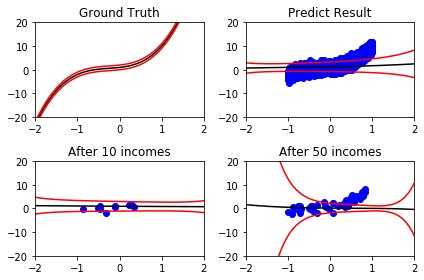

In [239]:
x=np.linspace(-2,2,500)
visualize(x, mean_record, variance_record, w)
#visualize(x, 10, mean_record[9], variance_record[49], '10 incomes')
#visualize(x, 50, mean_record[49], variance_record[49], '50 incomes')
#visualize(x, n_samples, mean_record[-1], variance_record[-1], '10000 incomes')
#visualize(x, 0, w, np.zeros((n,n)), 'Ground truth')